In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# Reading Data
train_data = pd.read_csv("C:\\Users\\User\\Documents\\Multimedia Project\\Multimedia Project\\codes and dataset\\dataset\\train.csv")
test_data = pd.read_csv("C:\\Users\\User\\Documents\\Multimedia Project\\Multimedia Project\\codes and dataset\\dataset\\test.csv")

In [3]:
print("This is Train Data: ")
train_data.head()


This is Train Data: 


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print("This is test data")
test_data.tail()

This is test data


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
print(train_data.shape)
print(test_data.shape)

(42000, 785)
(28000, 784)


This bar graph displaying how many number of entries each digit have in the train dataset:


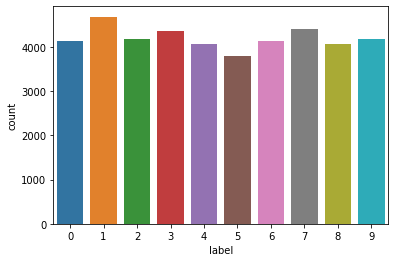

In [6]:
print("This bar graph displaying how many number of entries each digit have in the train dataset:")
sns.countplot(train_data["label"])


In [7]:
# To drop the first column from train dataset to prepare it for training
pixels = train_data.drop(["label"], axis=1)
target_data = train_data["label"]

*****************This will display the image of any row specified in iloc******************************
This is the label for the given image in the dataset 2


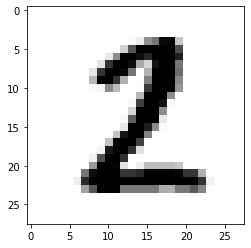

In [8]:
print("*****************This will display the image of any row specified in iloc******************************")
row_from_train_dataset =pixels.iloc[40000]
row_from_train_dataset =row_from_train_dataset*255
image_display=row_from_train_dataset.values.reshape(28,28)
plt.imshow(image_display ,cmap=matplotlib.cm.binary,interpolation="nearest")
print("This is the label for the given image in the dataset" ,target_data[40000] )


In [9]:
pixels = pixels/255.0

In [10]:
xtrain, xval, ytrain, yval = train_test_split(pixels, target_data, test_size=0.25, random_state=2019)

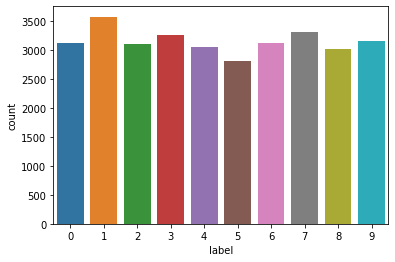

In [11]:
sns.countplot(ytrain)

In [12]:
poly_kernal = SVC(gamma=0.01, kernel='poly',degree=3)
fit_model=poly_kernal.fit(xtrain,ytrain)
predicted = poly_kernal.predict(xval)
print(predicted)

[4 0 5 ... 1 9 8]


In [13]:
print("accuracy", metrics.accuracy_score(yval, predicted))

accuracy 0.9644761904761905


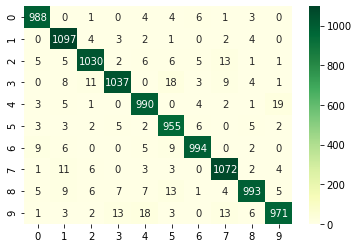

In [14]:
sns.heatmap(pd.DataFrame(metrics.confusion_matrix(yval, predicted)), annot=True, cmap="YlGn", fmt='g')


In [15]:
test_data = test_data/255.0


In [16]:
y_pred = poly_kernal.predict(test_data)
print(y_pred)

[2 0 9 ... 3 9 2]


In [17]:
submission = {}
submission['ImageId'] = range(1,28001)
submission['Label'] = y_pred
submission = pd.DataFrame(submission)

submission = submission[['ImageId', 'Label']]
submission = submission.sort_values(['ImageId'])
submission.to_csv("C:\\Users\\User\\Documents\\Multimedia Project\\Multimedia Project\\output\\submisision_poly.csv", index=False)
print(submission['Label'].value_counts().sort_index())

0    2747
1    3332
2    2807
3    2747
4    2771
5    2568
6    2731
7    2894
8    2668
9    2735
Name: Label, dtype: int64


This is the label for the given image:  2


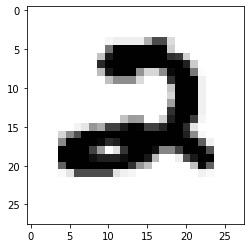

In [19]:
image_from_test_dataset=test_data.iloc[0]
image_from_test_dataset=image_from_test_dataset*255
image_display=image_from_test_dataset.values.reshape(28,28)
plt.imshow(image_display,cmap=matplotlib.cm.binary,interpolation="nearest")
print("This is the label for the given image: ", y_pred[0] )